<a href="https://colab.research.google.com/github/bdavis2/CS183/blob/master/w8_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [ ]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]

In [ ]:
print sentences

[['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'], ['this', 'is', 'the', 'second', 'sentence'], ['yet', 'another', 'sentence'], ['one', 'more', 'sentence'], ['and', 'the', 'final', 'sentence']]


In [ ]:
# train model
model = Word2Vec(sentences, min_count=1)

In [ ]:
# summarize the loaded model
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [ ]:
# summarize vocabulary
words = list(model.wv.vocab)
print words

['and', 'word2vec', 'for', 'sentence', 'this', 'is', 'one', 'second', 'another', 'the', 'first', 'yet', 'final', 'more']


In [ ]:
# access vector for one word
print(model['sentence'])

[ 1.0910820e-03 -1.5077452e-03 -3.2069760e-03 -9.9484180e-04
  3.1507821e-04  4.3721409e-03 -3.6966589e-03 -3.3398340e-03
 -4.5425897e-03  9.9963380e-04 -4.2361259e-03 -3.8322308e-03
  4.3286034e-03 -3.2514911e-03  2.9569527e-03 -3.7188190e-03
 -1.0051982e-03  4.8464374e-03 -3.5323880e-03  1.2242071e-04
 -4.5874268e-03  3.7173247e-03 -4.1582971e-03 -3.9330549e-03
 -8.7048812e-04 -4.5904196e-03  3.7684049e-03 -3.9869444e-03
  1.5684202e-03  4.3672328e-03  1.7569183e-03  1.4254355e-03
 -3.0226770e-03  1.5630876e-03  1.1366424e-03 -1.0663142e-03
  4.9594906e-03  1.5107748e-03 -3.5520273e-03 -1.7370946e-03
 -4.4726627e-03 -3.6770348e-03  3.5596718e-03 -7.3829072e-04
  7.4810127e-04  2.5676086e-03  8.0731243e-04 -2.7061251e-03
 -4.2320942e-03  3.4339249e-03  9.2918600e-04  4.3059429e-03
 -1.6868339e-03  2.3244848e-03 -3.9865668e-03  4.2214273e-03
  3.0529061e-03  2.7524345e-03  4.3230103e-03 -3.9409990e-03
 -2.2007530e-03 -2.5688580e-03 -4.1240761e-03 -1.5698475e-03
 -3.0006173e-03 -3.19348

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
# save model
model.save('model.bin')

/usr/local/lib/python2.7/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


#### Visualize the word embeddings

In [ ]:
# We can retrieve all of the vectors from a trained model as follows:
X = new_model[new_model.wv.vocab]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
print X

[[ 0.00014433  0.00243259  0.00120855 ...  0.00160275  0.00238136
  -0.00142696]
 [ 0.00268545  0.00369039 -0.00151664 ...  0.00428423  0.00036392
   0.00374638]
 [ 0.00253331 -0.00315945 -0.00052476 ... -0.00329089 -0.00386695
   0.00076367]
 ...
 [-0.00303264 -0.00099994 -0.00298973 ...  0.00232601  0.00168298
   0.00037159]
 [ 0.00125797  0.00258364  0.00374995 ... -0.00201355 -0.00047171
  -0.00132005]
 [-0.00147712 -0.00348135  0.00070508 ...  0.00050689 -0.00411672
  -0.00488935]]


**Plot Word Vectors Using PCA**: We can create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class as follows.

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

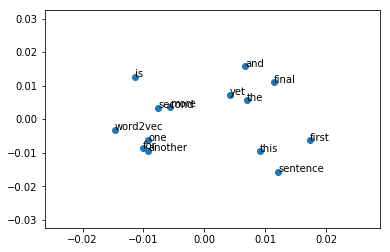

In [ ]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(new_model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()